# Python Cheatsheets - DATA ANALYSIS

## Data Visualization

### Matplotlib
Matplotlib is a Python package to create two-dimensional plots from data stored in a variety of data structures (i.e. lists, numpy arrays, pandas dataframes). It uses an object oriented approach for plotting to build plots step-by-step by adding new elements to the plot.

In [1]:
# import necessary libraries for plotting, and file reading
import matplotlib.pyplot as plt
import numpy as np
import csv

Matplotlib provides many common plotting commands. Some of these plotting commands are shown below. For more types, please refer to the original matplotlib package sources (https://matplotlib.org/stable/plot_types).

#### 1) Line Plot 
A line plot is a simple plot joining straight lines connecting data points where the x-axis and y-axis values intersect.

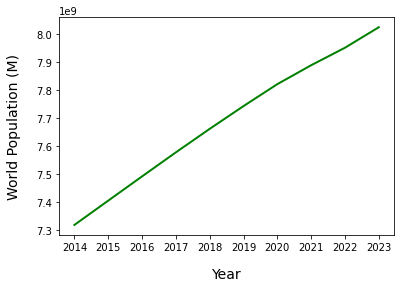

In [21]:
# Line Plot (world population extracted from https://databank.worldbank.org/)
file = open("data/world_population.csv", "r")
[year, pop] = list(csv.reader(file, delimiter=";"))
file.close()

pop = [int(i) for i in pop]
# Plot the data using preferred style (for detailed arguments: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
plt.plot(year, pop, color='green', linewidth=2.0)
plt.xlabel('Year', labelpad=15, fontsize=14)
plt.ylabel('World Population (M)', labelpad=15, fontsize=14)
plt.show()

#### 2) Scatter Plot 
A scatter plot is more suitable in cases such as assessing a correlation between two variables rather than observing a time data.

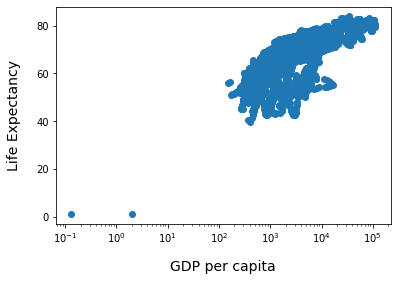

In [61]:
# Scatter Plot (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
file = open("data/life_expectancy_world.csv", "r")
table = list(csv.reader(file, delimiter=";"))
file.close()

# Get the related data for plotting (easier and faster wşth pandas, this is only for demonstration)
gdp_cap = [float(i[13]) for i in table[1:]]
life_exp = [float(i[20]) for i in table[1:]]

# Change the line plot below to a scatter plot
plt.scatter(gdp_cap, life_exp)

# Put the x-axis on a logarithmic scale
plt.xscale('log')

# Show plot
plt.xlabel('GDP per capita', labelpad=15, fontsize=14)
plt.ylabel('Life Expectancy', labelpad=15, fontsize=14)
plt.show()